<a href="https://colab.research.google.com/github/vkadis/ml/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка и аналитика
Все граффики как у всех тк что то новое придумать не мог, это основная аналитика



In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('Titanic.csv')

In [53]:
df_initial = df.copy(deep=True)

In [54]:
df_initial

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## График (количество выживших и погибших)

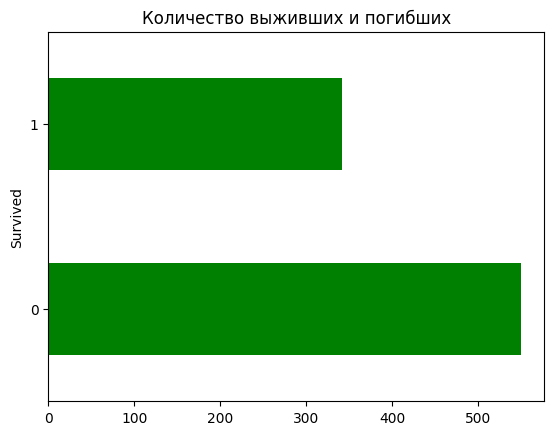

In [55]:
%matplotlib inline
total_survived = df['Survived'].value_counts()
total_survived
total_survived.plot(
    kind='barh',
    color='green'
)

plt.title('Количество выживших и погибших')
plt.show()

## График (Распределение возраста пасажиров)

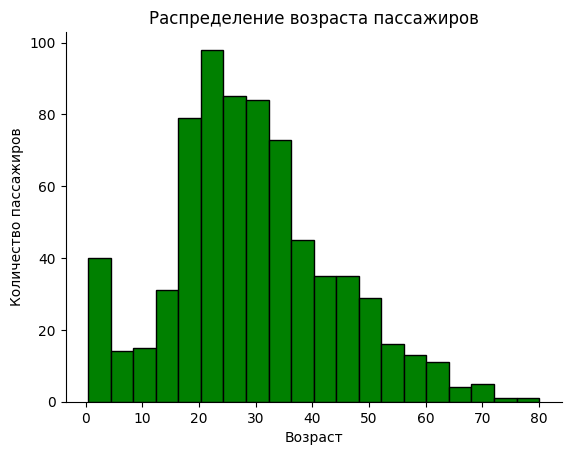

In [56]:

df_initial['Age'].plot(kind='hist', bins=20, color='green', edgecolor='black')


plt.gca().spines[['top', 'right']].set_visible(False)

plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')


plt.show()


## График (количество пасажиров по полу)

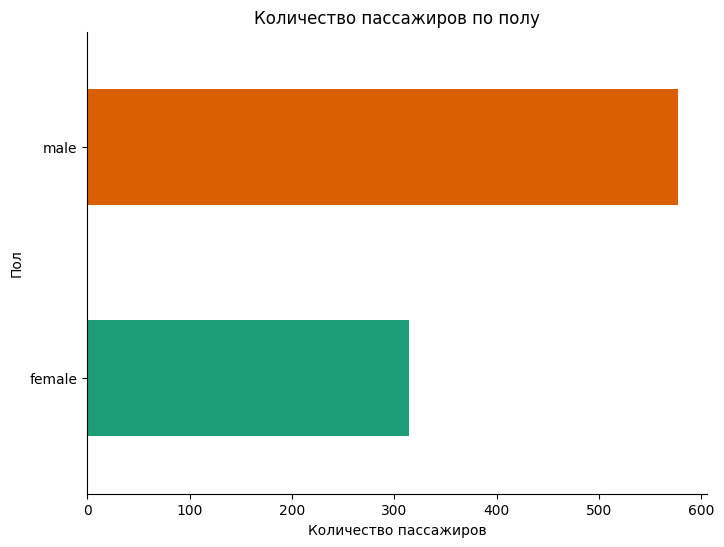

In [57]:



sex_counts = df_initial.groupby('Sex').size()

plt.figure(figsize=(8, 6))

sex_counts.plot(kind='barh', color=sns.color_palette('Dark2'))


plt.gca().spines[['top', 'right']].set_visible(False)


plt.title('Количество пассажиров по полу')
plt.xlabel('Количество пассажиров')
plt.ylabel('Пол')

plt.show()


## График (распределение выживаемости по полу)

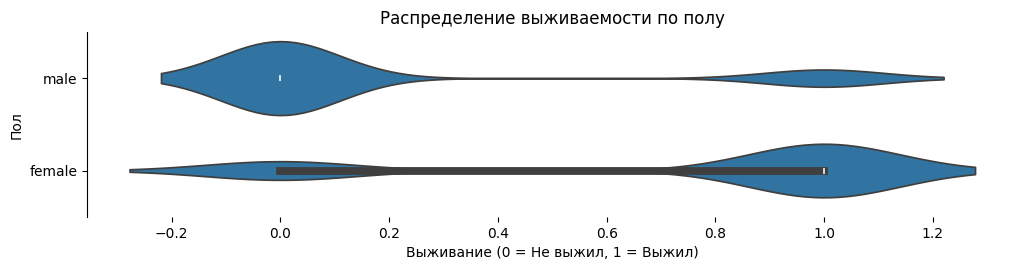

In [58]:


figsize = (12, 1.2 * len(df_initial['Sex'].unique()))
plt.figure(figsize=figsize)

sns.violinplot(data=df_initial, x='Survived', y='Sex', inner='box')


sns.despine(top=True, right=True, bottom=True, left=False)

plt.title('Распределение выживаемости по полу')
plt.xlabel('Выживание (0 = Не выжил, 1 = Выжил)')
plt.ylabel('Пол')


plt.show()


## График (распеределение выживших по классу билета)

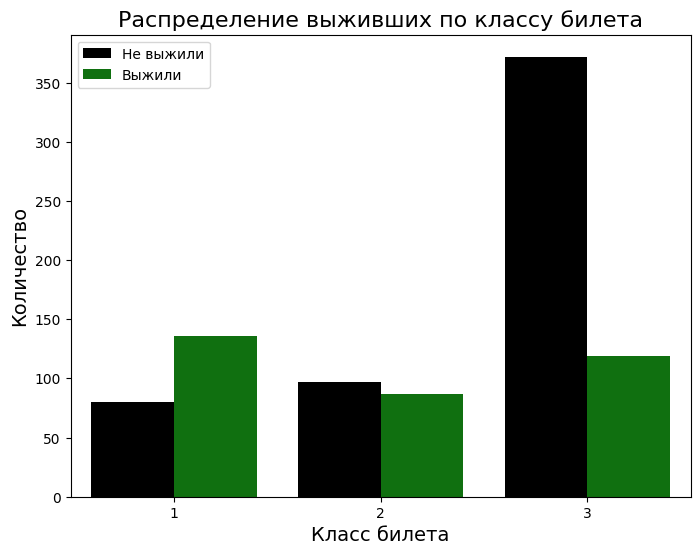

In [59]:
# Выживаемость в зависимости от класса
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette={0: 'black', 1: 'green'})

plt.title('Распределение выживших по классу билета', fontsize=16)
plt.xlabel('Класс билета', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.legend(['Не выжили', 'Выжили'])
plt.show()


# Обработка DataFrame

In [60]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [65]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [66]:
df['Age'].fillna(df['Age'].median(),inplace=True)

<ipython-input-66-e0c0624688bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [67]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [68]:
X = df.drop(columns=['Survived', 'Name', 'Fare', 'Ticket', 'PassengerId', 'SibSp', 'Parch'])
y = df['Survived']

In [69]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Modeling

In [70]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226


In [71]:
import numpy as np
np.var(df['Sex'])

0.22821808306282707

# Обучение

## Модель 1

In [72]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [73]:



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=200, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.4748 - loss: 0.7436 - val_accuracy: 0.5245 - val_loss: 0.7233
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5022 - loss: 0.7172 - val_accuracy: 0.5664 - val_loss: 0.6966
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5593 - loss: 0.6912 - val_accuracy: 0.5944 - val_loss: 0.6721
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6003 - loss: 0.6715 - val_accuracy: 0.6224 - val_loss: 0.6493
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6299 - loss: 0.6560 - val_accuracy: 0.6713 - val_loss: 0.6284
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6724 - loss: 0.6313 - val_accuracy: 0.6923 - val_loss: 0.6087
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7019 - loss: 0.6129 - val_accuracy: 0.6993 - val_loss: 0.5903
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7063 - loss: 0.6018 - val_accuracy: 0.7273 - val_loss: 0.5735
Epoch 9/50


### Test Accuracy

In [74]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8261 - loss: 0.4075 
Test Accuracy: 0.81


### Результаты обучения


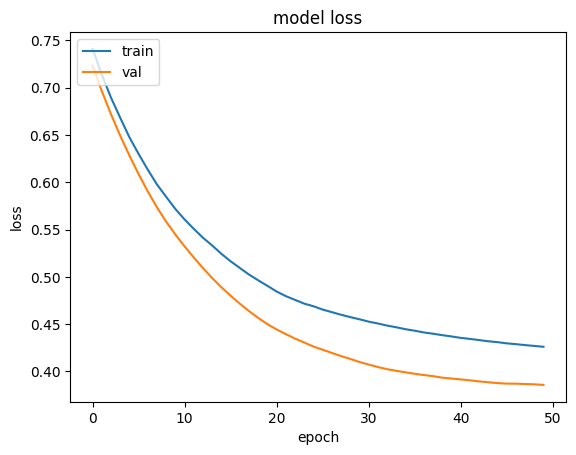

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Модель 2 и лучшая модель

In [76]:
from keras.layers import Dense, Dropout

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, batch_size=200, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.6001 - loss: 0.6788 - val_accuracy: 0.7552 - val_loss: 0.6612
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6720 - loss: 0.6594 - val_accuracy: 0.7762 - val_loss: 0.6525
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6126 - loss: 0.6847 - val_accuracy: 0.7972 - val_loss: 0.6446
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6738 - loss: 0.6541 - val_accuracy: 0.7972 - val_loss: 0.6345
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6508 - loss: 0.6483 - val_accuracy: 0.8112 - val_loss: 0.6232
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6747 - loss: 0.6436 - val_accuracy: 0.8112 - val_loss: 0.6093
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7176 - loss: 0.6189 - val_accuracy: 0.8182 - val_loss: 0.5934
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7011 - loss: 0.6176 - val_accuracy: 0.8531 - val_loss: 0.5773
Epoch 9/50

### Test Accuracy

In [77]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8301 - loss: 0.4352 
Test Accuracy: 0.82


### Результаты обучения второй модели

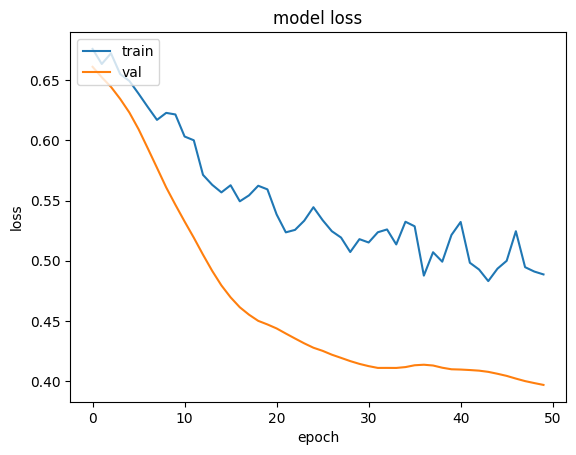

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Финальное задание

## Вся кроссвалидация и всё остальное

### Результаты по каждым наборам

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

def create_model():
  model = Sequential()
  model.add(Input(shape=(X_train.shape[1],)))  # Используем Input как первый слой
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

# Кросс-валидация
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
fold_no = 1
all_reports = []
print( 'Точность (Precision): показывает, насколько предсказания модели о том, что человек выжил (класс 1), были верными.')
print('Полнота (Recall): показывает, насколько хорошо модель обнаружила всех, кто на самом деле выжил. ')
print('F1-score: это среднее значение точности и полноты. ')
print('Поддержка (Support): это количество реальных случаев для каждого класса. ')
print('Точность модели (Accuracy): показывает, сколько всего предсказаний модель сделала правильно.')

print('Среднее значение (Macro avg): это средние значения по всем классам, не учитывающие количество примеров в каждом классе. ')
print('Взвешенное среднее (Weighted avg): средние значения, взвешенные по количеству примеров в каждом классе. \n')

for train_index, val_index in kfold.split(X_train, y_train):
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]

    # Извлечение y_train с использованием iloc
    y_fold_train = y_train.iloc[train_index].values
    y_fold_val = y_train.iloc[val_index].values

    model = create_model()
    model.fit(X_fold_train, y_fold_train, epochs=50, batch_size=200, verbose=0)

    y_val_pred = (model.predict(X_fold_val) > 0.5).astype("int32")

    report = classification_report(y_fold_val, y_val_pred, output_dict=True)
    all_reports.append(report)

    print(f"Fold {fold_no}")
    print(classification_report(y_fold_val, y_val_pred))
    matr = confusion_matrix(y_fold_val, y_val_pred)
    print('матрица')
    print(matr)
    tn, fp, fn, tp =matr.ravel()
    print(f"Модель предсказала, что погибнет, а по факту не погибло: {fp} человек.")
    print(f"Модель предсказала, что не погибнет, а по факту погибло: {fn} человек.")
    print(f"Модель предсказала, что не погибнет, и по факту не погибло: {tn} человек.")
    print(f"Модель предсказала, что погибнет, и по факту погибло: {tp} человек.")
    fold_no += 1


Точность (Precision): показывает, насколько предсказания модели о том, что человек выжил (класс 1), были верными.
Полнота (Recall): показывает, насколько хорошо модель обнаружила всех, кто на самом деле выжил. 
F1-score: это среднее значение точности и полноты. 
Поддержка (Support): это количество реальных случаев для каждого класса. 
Точность модели (Accuracy): показывает, сколько всего предсказаний модель сделала правильно.
Среднее значение (Macro avg): это средние значения по всем классам, не учитывающие количество примеров в каждом классе. 
Взвешенное среднее (Weighted avg): средние значения, взвешенные по количеству примеров в каждом классе. 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Fold 1
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       148
           1       0.68      0.70      0.69        90

    accuracy                           0.76       238
   macro avg       0.75      0.75      0.75       238
weighted avg       0.77    

In [80]:
# Обучение на всем обучающем наборе
final_model = create_model()
final_model.fit(X_train, y_train, epochs=50, batch_size=200, verbose=1)

# Предсказание на тестовом наборе
y_test_pred = (final_model.predict(X_test) > 0.5).astype("int32")

# Получение метрик
final_report = classification_report(y_test, y_test_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_test_pred)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5969 - loss: 0.6951
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6110 - loss: 0.6831 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6446 - loss: 0.6870 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6301 - loss: 0.6808 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6454 - loss: 0.6611 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6685 - loss: 0.6612 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6374 - loss: 0.6513 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6593 - loss: 0.6457 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6737 - loss: 0.6315 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6838 - loss: 0.6253 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6787 - loss: 0.6122 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7023 - loss: 0.5956 
Ep

### Результаты по всему набору

In [81]:

print("Final Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(conf_matrix)

Final Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
[[93 12]
 [22 52]]


In [82]:
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Модель предсказала, что погибнет, а по факту не погибло: {fp} человек.")
print(f"Модель предсказала, что не погибнет, а по факту погибло: {fn} человек.")
print(f"Модель предсказала, что не погибнет, и по факту не погибло: {tn} человек.")
print(f"Модель предсказала, что погибнет, и по факту погибло: {tp} человек.")

Модель предсказала, что погибнет, а по факту не погибло: 12 человек.
Модель предсказала, что не погибнет, а по факту погибло: 22 человек.
Модель предсказала, что не погибнет, и по факту не погибло: 93 человек.
Модель предсказала, что погибнет, и по факту погибло: 52 человек.


## Итог

В ходе лабораторной работы я освоил предобработку, аналитику данных перед обучением модели. В ходе работы я построил графики, а так же выделял признаки по которым проводил аналитику. Я построил несколько нейронных моделей, обучил их и оценил их эффективность с помощью кросс-валидации, отчета о классификации и матрицы ошибок.